In [56]:
!pip install pandas

In [55]:
# Import library yang diperlukan

# 1. Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

# 2. NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

# 3. LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

# 4. KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# 5. Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# 6. Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# 7. Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

# 8. Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns# Import library yang diperlukan

# 1. Pandas untuk manipulasi dan analisis data, terutama dengan struktur DataFrame.
import pandas as pd

# 2. NumPy untuk operasi matematis dan komputasi array n-dimensi.
import numpy as np

# 3. LabelBinarizer dari sklearn.preprocessing untuk mengonversi label kategori
#    menjadi format biner (one-hot encoding).
from sklearn.preprocessing import LabelBinarizer

# 4. KNeighborsClassifier dari sklearn.neighbors adalah algoritma K-Nearest Neighbors (KNN)
#    untuk klasifikasi berbasis jarak.
from sklearn.neighbors import KNeighborsClassifier

# 5. Fungsi-fungsi evaluasi dari sklearn.metrics:
#    - accuracy_score: untuk menghitung akurasi prediksi.
#    - precision_score: untuk menghitung presisi model.
#    - recall_score: untuk menghitung sensitivitas (recall).
#    - f1_score: untuk menghitung rata-rata harmonik antara presisi dan recall.
#    - classification_report: untuk menampilkan ringkasan metrik evaluasi.
#    - matthews_corrcoef: untuk menghitung koefisien korelasi Matthews.
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, matthews_corrcoef
)

# 6. Fungsi `euclidean` dari scipy.spatial.distance untuk menghitung jarak Euclidean
#    antara dua titik dalam ruang n-dimensi.
from scipy.spatial.distance import euclidean

# 7. Matplotlib untuk membuat visualisasi data (plotting).
import matplotlib.pyplot as plt

# 8. Seaborn untuk membuat visualisasi data statistik yang lebih menarik.
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
df_cc = pd.read_csv('/content/drive/MyDrive/knn/seattle-weather.csv')
df_cc

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


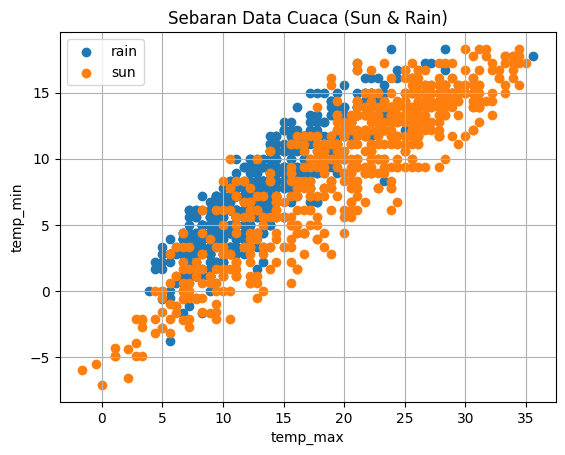

In [67]:
#VISUALISASI DATA
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Filter data untuk hanya menyertakan 'sun' dan 'rain'
filtered_df = df_cc[df_cc['weather'].isin(['sun', 'rain'])]
# Data yang difilter disimpan dalam variabel filtered_df.
df = filtered_df

for w, d in filtered_df.groupby('weather'):
    ax.scatter(d['temp_max'], d['temp_min'], label=w)

plt.legend(loc='upper left')
plt.title('Sebaran Data Cuaca (Sun & Rain)')
plt.xlabel('temp_max')
plt.ylabel('temp_min')
plt.grid(True)
plt.show()

In [66]:
import numpy as np

# Filter the dataframe to include only 'sun' and 'rain' weather for both x_train and y_train
filtered_df = df_cc[df_cc['weather'].isin(['sun', 'rain'])]
# Data yang difilter disimpan dalam variabel filtered_df.
df = filtered_df

# Now, use the filtered dataframe to create both x_train and y_train
x_train = np.array(filtered_df[['temp_max', 'temp_min']])
y_train = np.array(filtered_df['weather'])

print(f'x_train:\n{x_train}\n')
print(f'y_train: {y_train}')

x_train:
[[10.6  2.8]
 [11.7  7.2]
 [12.2  5.6]
 ...
 [ 5.   1.7]
 [ 5.6 -1. ]
 [ 5.6 -2.1]]

y_train: ['rain' 'rain' 'rain' ... 'rain' 'sun' 'sun']


In [50]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train:\n{y_train}')

y_train:
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [51]:
y_train = y_train.flatten()
print(f'y_train: {y_train}')

y_train: [0 0 0 ... 0 1 1]


In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Menentukan jumlah nearest neighbors/tetangga terdekat (K) yang digunakan dalam algoritma K-Nearest Neighbors (KNN)
K = 3

# Membuat objek model KNeighborsClassifier dengan parameter n_neighbors=K
model = KNeighborsClassifier(n_neighbors=K)

# Melatih model KNN menggunakan data latih (x_train) dan label latih (y_train)
# model.fit() akan menemukan pola dalam data latih untuk kemudian digunakan dalam prediksi
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
# Menetapkan nilai untuk data baru
temp_max = 20
temp_min = 5
# reshape(1, -1) mengubah array 1D menjadi array 2D dengan 1 baris dan sejumlah kolom sesuai panjang array
X_new = np.array([temp_max, temp_min]).reshape(1, -1)
# Menampilkan x_new untuk memverifikasi format data baru (array 2D dengan 1 baris)
X_new

array([[20,  5]])

In [57]:
y_new = model.predict(X_new)
y_new

array([1])

In [58]:
lb.inverse_transform(y_new)

array(['sun'], dtype='<U4')

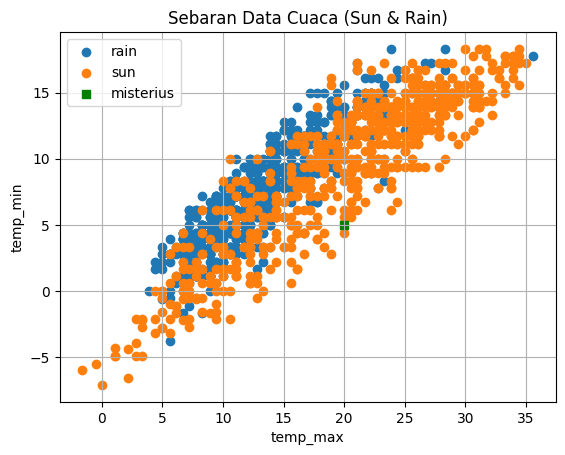

In [61]:
#VISUALISASI DATA
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Filter data untuk hanya menyertakan 'sun' dan 'rain'
filtered_df = df_cc[df_cc['weather'].isin(['sun', 'rain'])]

for w, d in filtered_df.groupby('weather'):
    ax.scatter(d['temp_max'], d['temp_min'], label=w)

plt.scatter(temp_max,
            temp_min,
            marker='s',
            color='green',
            label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Cuaca (Sun & Rain)')
plt.xlabel('temp_max')
plt.ylabel('temp_min')
plt.grid(True)
plt.show()

In [62]:
misterius = np.array([temp_max, temp_min])
misterius

array([20,  5])

In [63]:
x_train

array([[10.6,  2.8],
       [11.7,  7.2],
       [12.2,  5.6],
       ...,
       [ 5. ,  1.7],
       [ 5.6, -1. ],
       [ 5.6, -2.1]])

In [64]:
# Menghitung jarak Euclidean antara data baru (New) dan setiap data dalam x_train
# Jarak Euclidean dihitung untuk setiap elemen (d) dalam x_train menggunakan list comprehension
from scipy.spatial.distance import euclidean

# Menampilkan list 'data_jarak' yang berisi jarak Euclidean antara data baru (New) dan setiap data latih
data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[9.654014708917737,
 8.586617494683225,
 7.823042886243179,
 11.31591799192624,
 15.84929020492716,
 12.987686476043377,
 10.239140588936163,
 10.6,
 14.579780519610026,
 15.179591562357665,
 15.430489298787645,
 16.906803364326446,
 11.82285921425101,
 13.59154148726332,
 12.33288287465668,
 10.384603988597735,
 11.116204388189342,
 11.765202930676546,
 14.0089257261219,
 10.656922632730332,
 11.75159563633807,
 10.656922632730332,
 11.229425630903835,
 12.156479753612885,
 6.260990336999411,
 4.4,
 6.93541635375988,
 5.1088159097779196,
 5.215361924162119,
 10.0,
 9.330058949438637,
 7.397972695272671,
 11.116204388189342,
 11.7,
 12.814054783713077,
 13.860014430006919,
 12.912397143830422,
 10.017983829094554,
 13.345411196362592,
 13.59154148726332,
 12.638433447227547,
 10.384603988597735,
 10.239140588936163,
 11.90504094911059,
 13.313526955694348,
 12.987686476043377,
 15.123822268196623,
 14.436758638974332,
 13.345411196362592,
 7.983107164506813,
 9.552486587271401,
 12.808

In [80]:
filtered_df['jarak'] = data_jarak
filtered_df.sort_values('jarak')

<ipython-input-80-5e185f2a44fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['jarak'] = data_jarak


,date,precipitation,temp_max,temp_min,wind,weather,jarak
111,2012-04-21,0.0,20.0,4.4,2.3,sun,0.600000
834,2014-04-14,0.0,20.0,5.6,2.6,sun,0.600000
833,2014-04-13,0.0,20.6,5.6,3.1,sun,0.848528
99,2012-04-09,0.0,20.0,6.1,2.1,sun,1.100000
1222,2015-05-07,0.0,20.6,6.1,3.0,sun,1.252996
...,...,...,...,...,...,...,...
708,2013-12-09,0.0,1.1,-4.9,1.3,sun,21.335885
704,2013-12-05,0.0,1.1,-4.9,2.6,sun,21.335885
766,2014-02-05,0.0,-0.5,-5.5,6.6,sun,23.032586
706,2013-12-07,0.0,0.0,-7.1,3.1,sun,23.375414


In [69]:
#EVALUASI KNN CLASSIFICATION MODEL
#TESTING SET
X_test = np.array([[168, 65], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(np.array(['sun', 'sun', 'rain', 'rain'])).flatten()

print(f'X_test: \n{X_test}\n')
print(f'y_test:\n{y_test}')

X_test: 
[[168  65]
 [180  96]
 [160  52]
 [169  67]]

y_test:
[1 1 0 0]


In [70]:
#PREDIKSI TERHADAP TESTING SET
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1])

In [71]:
#ACCURACY
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.5


In [72]:
#PRECISSION
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'Precission: {prec}')

Precission: 0.5


In [73]:
#RECALL
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print(f'Recall: {rec}')

Recall: 1.0


In [74]:
#F1 SCORE
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1}')

F1-score: 0.6666666666666666


In [76]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report
cls_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{cls_report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
#Mathews Correlation Coefficient
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'MCC: {mcc}')

MCC: 0.0
